<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/seunghyeon/Exercise12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 심화문제 12.3
- 나만의 오토인코더를 만들어 손글씨 데이터를 이용하여 숫자 3 표현하는 데이터의 잠재표현을 추출하라

In [37]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [38]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers

my_enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3, activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
my_enc_cnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                589888    
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [40]:
my_dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
my_dec_cnn.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9216)              599040    
_________________________________________________________________
reshape_3 (Reshape)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


In [48]:
idx = train_labels == 3
img3 = train_images[idx] # 3만 추출

<Figure size 432x288 with 0 Axes>

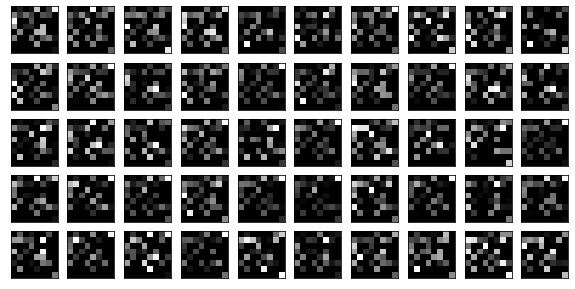

In [49]:
samples = img3.reshape(-1, 28, 28, 1)
encoded = my_enc_cnn.predict(samples)
plot_images(5, 10, encoded.reshape(-1, 8, 8)) # 3의 잠재표현

<Figure size 432x288 with 0 Axes>

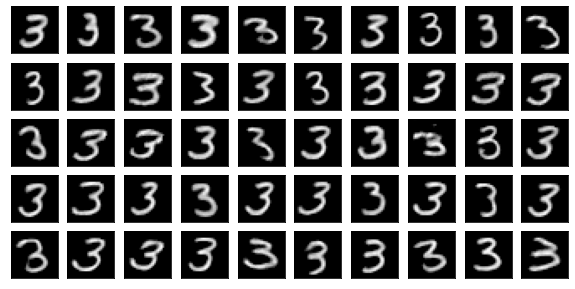

In [50]:
recovered = my_dec_cnn.predict(encoded)
plot_images(5, 10, recovered.reshape(-1, 28, 28)) # 3을 복원

Epoch 1/5
192/192 [==============================] - 14s 70ms/step - loss: 2564.3484
Epoch 2/5
192/192 [==============================] - 13s 69ms/step - loss: 1337.3706
Epoch 3/5
192/192 [==============================] - 13s 70ms/step - loss: 996.6708
Epoch 4/5
192/192 [==============================] - 13s 69ms/step - loss: 840.7652
Epoch 5/5
192/192 [==============================] - 13s 69ms/step - loss: 727.5245


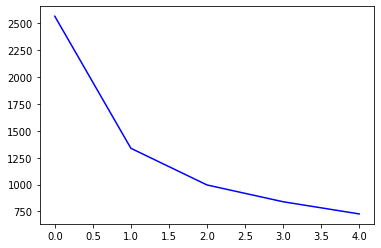

In [41]:
AE_CNN = models.Sequential([my_enc_cnn, my_dec_cnn])
AE_CNN.compile(loss = 'mse')

X_cnn = img3.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 5)
plt.plot(history.history['loss'], 'b-')

In [55]:
AE_CNN.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 64)                592368    
_________________________________________________________________
sequential_21 (Sequential)   (None, 28, 28, 1)         601505    
Total params: 1,193,873
Trainable params: 1,193,873
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

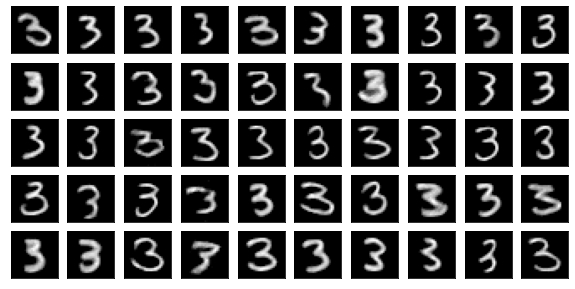

In [57]:
# AE_CNN 모델에 test 데이터 넣음
test_idx = test_labels == 3
test_img3 = test_images[test_idx] # 3만 추출

X_test = test_img3.reshape(-1, 28, 28, 1)
test_encoded = AE_CNN.predict(X_test)
plot_images(5, 10, test_encoded.reshape(-1, 28, 28))

## LAB 12.1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성하기    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

m = 1500
X, color = make_a_roll(m)

from tensorflow.keras import models
from tensorflow.keras import layers
enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                         activation = 'elu')])
dec = models.Sequential([layers.Dense(3, input_shape=[2], 
                                         activation = 'elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 8         
_________________________________________________________________
sequential_5 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2369
Epoch 2/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2134
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1646
Epoch 6/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1516
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1379
Epoch 8/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1240
Epoch 9/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 10/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0973
Epoch 11/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0854
Epoch 12/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0747
Epoch 13/30
47/47 [==============================

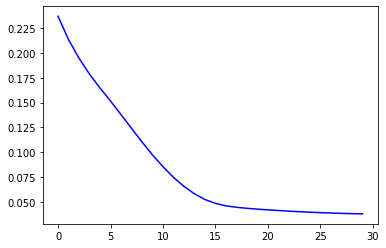

In [9]:
history = AE.fit(X, X, epochs = 30)
plt.plot(history.history['loss'], 'b-')

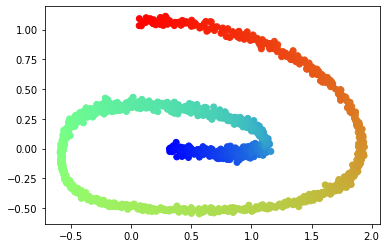

In [10]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()


## LAB 12.2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # Creating dataset    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T    

m = 1500
X, color = make_a_roll(m)

from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(2, activation='elu')])
dec = models.Sequential([layers.Dense(2, input_shape=[2],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(3, activation='elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
history = AE.fit(X, X, epochs = 30)

Epoch 1/30
47/47 [==============================] - 1s 2ms/step - loss: 0.2147
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1824
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1246
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1177
Epoch 7/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 9/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1056
Epoch 10/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 11/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1009
Epoch 12/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 13/30
47/47 [==============================

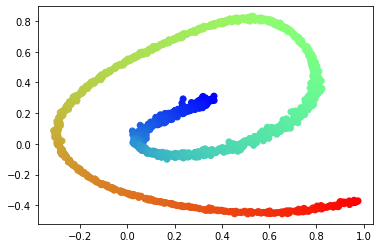

In [12]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

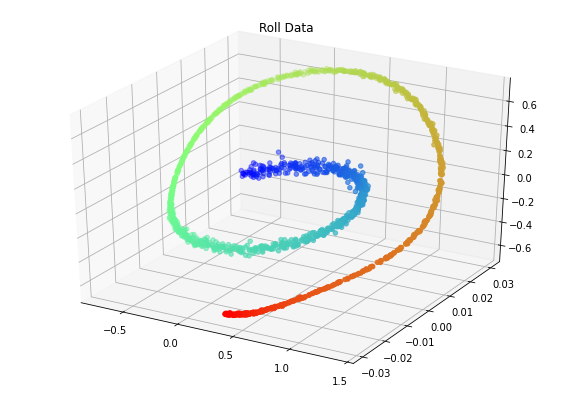

In [13]:
rcvrd = dec.predict(reduced)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(rcvrd[:,0], rcvrd[:,1], rcvrd[:,2], color = color)
plt.title("Roll Data")
plt.show()

## LAB 12.3

In [14]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(64, input_shape=(784, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(64, activation='elu')])
dec = models.Sequential([layers.Dense(64, input_shape=(64, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(784, activation='elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()


4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 64)                58560     
_________________________________________________________________
sequential_11 (Sequential)   (None, 784)               59280     
Total params: 117,840
Trainable params: 117,840
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1951.4260
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1251.5350
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1131.9719
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1074.2151
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1038.0608


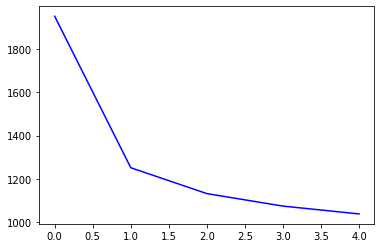

In [15]:
X = train_images.reshape(-1, 28*28)
history = AE.fit(X, X, epochs = 5)
plt.plot(history.history['loss'], 'b-')

In [16]:
rndidx = np.random.randint(0, len(train_images) - 50)
data = X[rndidx:rndidx+50]
train_reduced = enc.predict(data) # enc는 64차원 벡터를 반환한다.
print(train_reduced.shape)

(50, 64)


<Figure size 432x288 with 0 Axes>

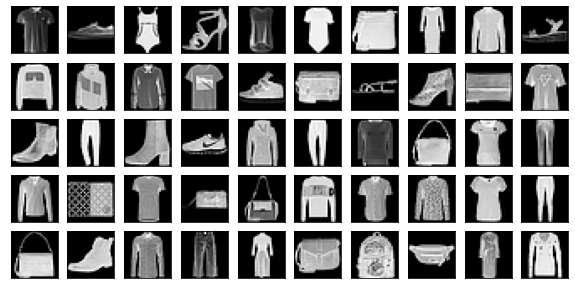

<Figure size 432x288 with 0 Axes>

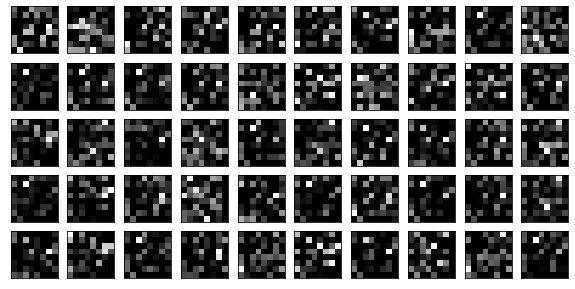

In [34]:
plot_images(5, 10, data.reshape(-1, 28, 28))
plot_images(5, 10, train_reduced.reshape(-1, 8, 8))

<Figure size 432x288 with 0 Axes>

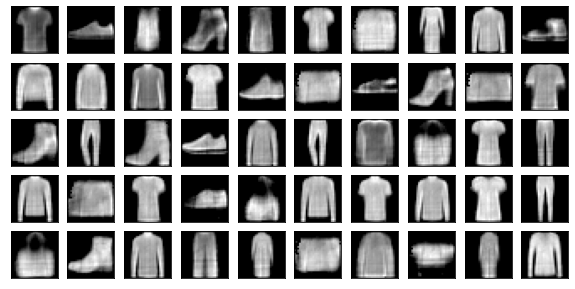

In [18]:
recovered = dec.predict(train_reduced) # dec는 64(8 * &)차원을 784(28 * 28)로 복원한다. 
plot_images(5, 10, recovered.reshape(-1, 28, 28))

<Figure size 432x288 with 0 Axes>

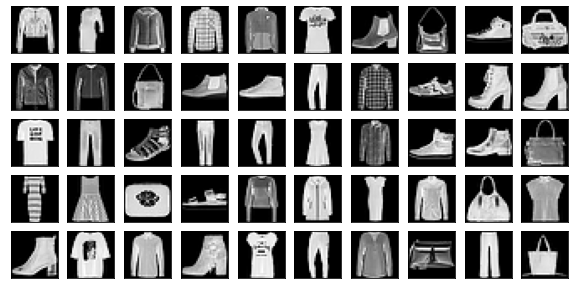

In [19]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

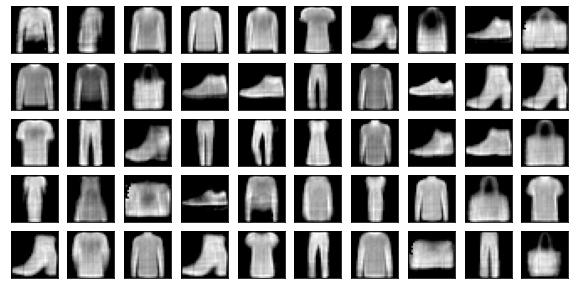

In [20]:
sample_flat = samples.reshape(-1, 28*28)
sample_reduced = enc.predict(sample_flat) # 압축
recovered = dec.predict(sample_reduced) # 복원
plot_images(5, 10, recovered.reshape(-1, 28, 28))

- 위는 단순한 밀집 계층
- 컨볼루션을 사용해보자

In [21]:
# 컨볼루션을 활용한 인코더
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3, activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                589888    
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 컨볼루션을 활용한 디코더
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)), # 이미지 24 * 24, 16채널
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')]) # deconvolusion, 인코더의 입력과 같은 차원으로 데이터가 바뀜
dec_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 9216)              599040    
_________________________________________________________________
reshape_1 (Reshape)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1875/1875 [==============================] - 131s 69ms/step - loss: 1300.3145
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 700.4631
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 609.5468
Epoch 4/5
1875/1875 [==============================] - 131s 70ms/step - loss: 565.9471
Epoch 5/5
1875/1875 [==============================] - 131s 70ms/step - loss: 540.8484


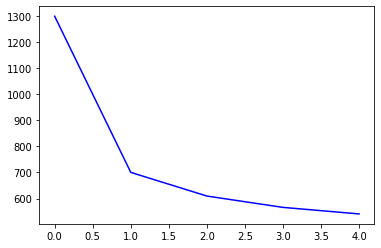

In [23]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 5)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

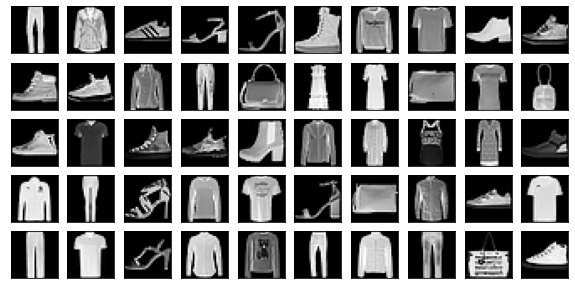

In [24]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

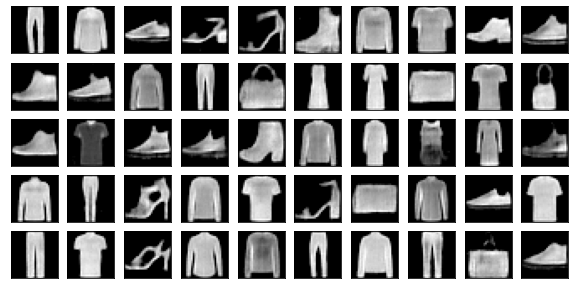

In [25]:
samples = samples.reshape(-1, 28, 28, 1)
reduced = enc_cnn.predict(samples)
recovered = dec_cnn.predict(reduced) # 
plot_images(5, 10, recovered.reshape(-1, 28, 28))

##LAB 12.4

In [ ]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

from tensorflow.keras import models
from tensorflow.keras import layers

enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

In [ ]:
# 드레스만 인코딩하여 잠재표현을 얻자
dress_idx = train_labels == 3    # 드레스의 클래스 번호는 3
dress_array = train_images[dress_idx]
plot_images(5, 10, dress_array.reshape(-1, 28, 28))

In [ ]:
print(train_images.shape)
dress_array = dress_array.reshape(-1,28,28, 1)
dress_encoded = enc_cnn.predict(dress_array)
plot_images(5, 10, dress_encoded.reshape(-1, 10, 10))

In [ ]:
dress_latent = dress_encoded.mean(axis = 0)
plt.imshow(dress_latent.reshape(10,10), cmap='gray')

In [ ]:
dress_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_dress = dress_latent*(1+np.random.randn(100)*0.3)
    dress_latent_augmented.append(new_dress)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
dress_latent_augmented = np.array(dress_latent_augmented)

dress_generated = dec_cnn.predict([dress_latent_augmented])
plot_images(5, 10, dress_generated.reshape(-1, 28, 28))